# IBM Developer Skills Network

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = 'https://raw.githubusercontent.com/sonpn82/Data-analysis-with-python/master/module_5_auto.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual

## Function for plotting

In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# Training and testing

In [37]:
y_data = df['price']

In [38]:
x_data = df.drop('price', axis=1) # remove price 

## Train test split

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [11]:
x_train_1, x_test_1,y_train_1,y_test_1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)

print("number of test samples :", x_test_1.shape[0])
print("number of training samples :", x_train_1.shape[0])

number of test samples : 81
number of training samples : 120


## Create linear regression object

In [12]:
from sklearn.linear_model import LinearRegression
lre = LinearRegression()

In [13]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [14]:
lre.score(x_test[['horsepower']], y_test)

0.3635875575078824

In [15]:
lre.score(x_train[['horsepower']],y_train)

0.6619724197515103

### Test data score is much lower than train data score

In [16]:
lre1=LinearRegression()
lre1.fit(x_train_1[['horsepower']], y_train_1)
print(lre1.score(x_test_1[['horsepower']], y_test_1))
print(lre1.score(x_train_1[['horsepower']], y_train_1))

0.7139364665406974
0.5754067463583004


## Cross validation score

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)  # 4 folds

In [19]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [20]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [21]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [22]:
Rcross2 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)  # 2 folds
Rcross2
print("The mean ofthe folds are", Rcross2.mean(), "and the standard deviation is", Rcross2.std())

The mean ofthe folds are 0.5166761697127429 and the standard deviation is 0.07348004195771385


In [23]:
from sklearn.model_selection import cross_val_predict

In [24]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Overfitting, under fitting and model selection

In [25]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [26]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [27]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


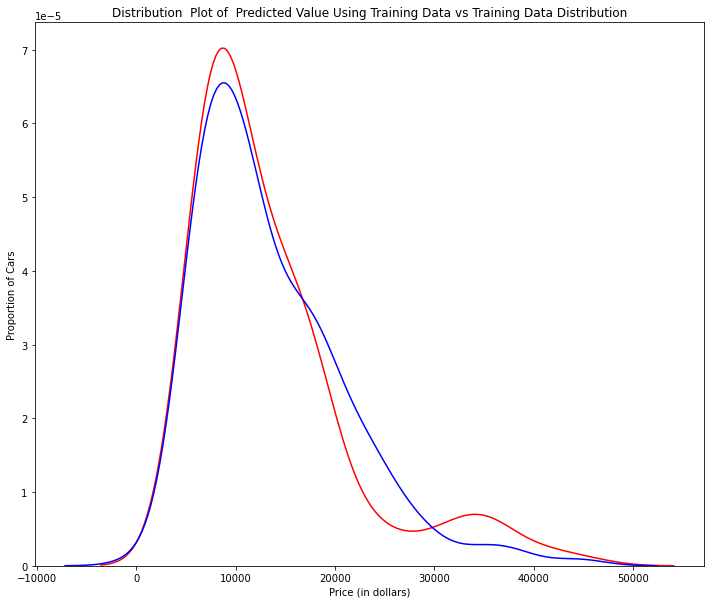

In [29]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


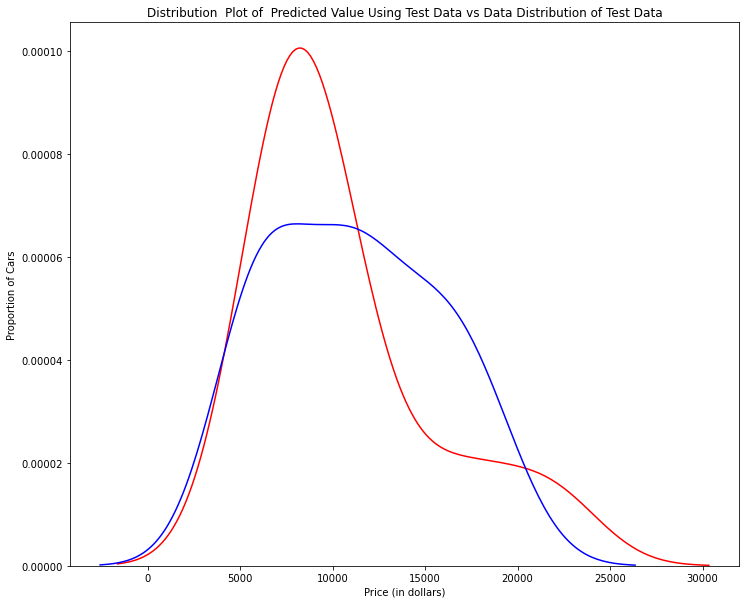

In [30]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

### Accuracy in test data is much lower compared to train data

## Overfitting

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [41]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [42]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)  # transformed x data can be used as a linear regression model

LinearRegression()

In [43]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.60536562,  7307.93827329, 12213.74831511, 18893.34034288,
       19996.06444404])

In [44]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.60536562  7307.93827329 12213.74831511 18893.34034288]
True values: [ 6295. 10698. 13860. 13499.]


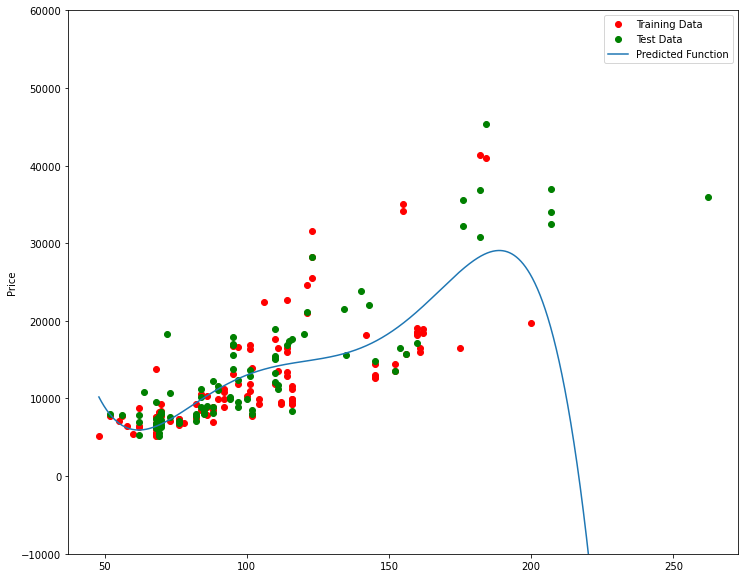

In [45]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

### Model fail after horsepower > 200

In [46]:
poly.score(x_train_pr, y_train)

0.5567716898973636

In [47]:
poly.score(x_test_pr, y_test)

-29.871038732033867

### Minus value of score R^2 is sign of overfitting

Text(3, 0.75, 'Maximum R^2 ')

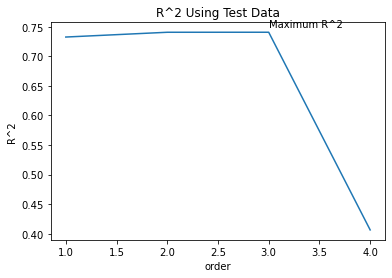

In [48]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

### R^2 peak at order 3 & drop suddenly

In [49]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [50]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [51]:
pr1=PolynomialFeatures(degree=2)

In [52]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower','curb-weight','engine-size','highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower','curb-weight','engine-size','highway-mpg']])

In [53]:
x_train_pr1.shape

(110, 15)

In [54]:
poly1=LinearRegression().fit(x_train_pr1,y_train)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


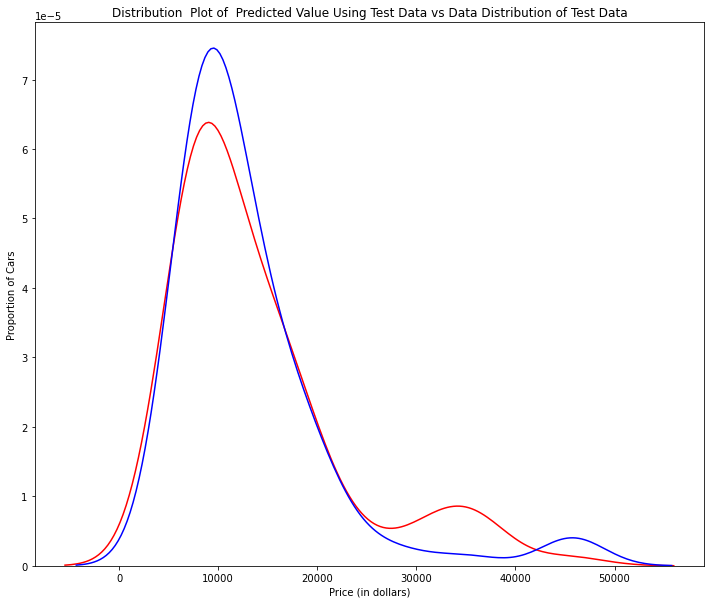

In [55]:
yhat_test1=poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

# Ridge regression

In [56]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [57]:
from sklearn.linear_model import Ridge

In [58]:
RigeModel = Ridge(alpha=0.1)

In [59]:
RigeModel.fit(x_train_pr, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.1)

In [60]:
yhat = RigeModel.predict(x_test_pr)

In [61]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326844 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


In [62]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

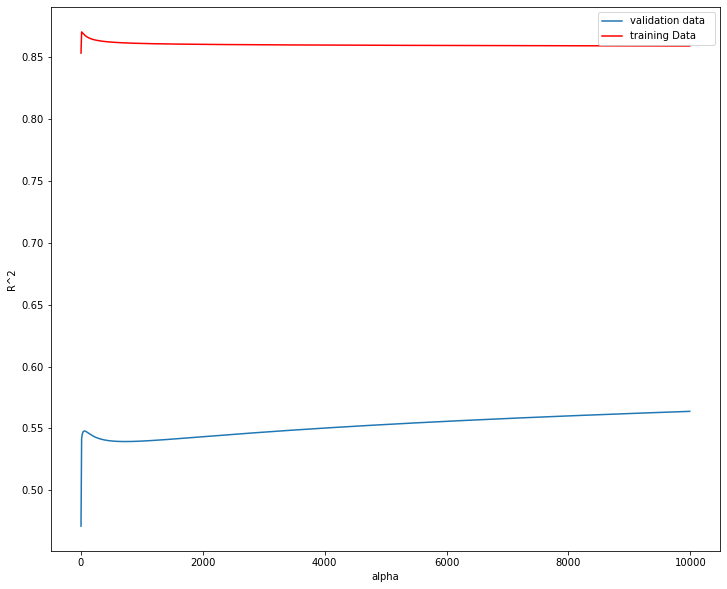

In [63]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [64]:
RigeModel = Ridge(alpha=10)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440210072

# Grid search

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1  # Alpha for hyper parameter

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [67]:
RR = Ridge()  # create ridge object
RR

Ridge()

In [68]:
Grid1  = GridSearchCV(RR, parameters1, cv=4)  # create grid object

In [69]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [70]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [71]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.841164983103615

In [72]:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000], 'normalize':[True, False]}] # 2 hyper parameters
Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower','curb-weight','engine-size','highway-mpg']],y_data)
Grid2.best_estimator_

Ridge(alpha=0.1, normalize=True)